In [ ]:
library(caret)
library(randomForest)
library(tidymodels)

In [2]:
train <- read.csv(file = '../../Data/training_data.csv')
train <- subset(train,select = -SWEETORSOUR)
train$Intensity <- as.numeric(train$Intensity)
Y <- train$VALENCE.PLEASANTNESS
train <- subset(train,select = -VALENCE.PLEASANTNESS)

In [24]:
train.Z <- subset(train,select = -nearZeroVar(train))
correlation <- cor(train.Z)
id <- sort(findCorrelation(correlation, cutoff=0.99999))
data.unC <- train.Z[,-id]

In [9]:
MSE.estimation <- function (Data,valid.split,p,ntree,mtry,maxnodes) {
    MSE <- c()
    for (i in 1:p){
        id <- sample(nrow(Data),nrow(Data)*0.8)
        train <- Data[id,]
        valid <- Data[-id,]
        RF <- randomForest(VALENCE.PLEASANTNESS ~ ., train, mtry = mtry, ntree = ntree, maxnodes = maxnodes)
        MSE <- append(MSE,mean((predict(RF,subset(valid,select = -VALENCE.PLEASANTNESS))-valid$VALENCE.PLEASANTNESS)^2))
        }
    mean(MSE)
}

In [25]:
data.unC$VALENCE.PLEASANTNESS <- Y  
dim(data.unC)

[1]  708 2446

In [26]:
MSE.estimation (data.unC, valid.split = 0.75, 6, ntree = 15000, mtry = 20, maxnodes = 20)

[1] 478.2658

In [14]:
MSE.estimation (data.unC, valid.split = 0.95, 10, ntree = 1800, mtry = 500, maxnodes = 20)

[1] 471.1064

===============================================================================================

In [ ]:
library(glmnet)

In [31]:
train.Z$VALENCE.PLEASANTESS <- Y
a <- ncol(train.Z)
corY <- cor(train.Z)[a,]
cut <- sort(which(abs(corY)>0.1, arr.ind=TRUE))


In [56]:
T <- as.matrix(train.Z[,cut])
T <- subset(T,select = -VALENCE.PLEASANTESS)


In [57]:
dim(T)
head(T)

[1] 708 566

nO,nS,nHM,nBnz,ZM1Kup,Xt,Dz,SPI,PW5,MAXDP,...,F02.C.S.,F02.O.O.,F03.C.O.,F03.C.S.,F04.C.O.,F05.C.O.,MLOGP,BLTF96,BLTD48,BLTA96
2,0,0,0,189.471,0.317,32,8.808,0.077,3.662,...,0,1,2,0,3,4,3.026,-3.96,-4.19,-4.26
1,0,0,1,117.736,0.420,19,4.176,0.078,1.469,...,0,0,2,0,1,1,2.193,-3.25,-3.40,-3.42
3,0,0,2,293.207,0.280,39,7.015,0.090,4.772,...,0,1,7,0,10,7,3.202,-4.11,-4.36,-4.43
2,0,0,0,107.885,0.675,14,3.786,0.000,2.699,...,0,1,4,0,0,0,0.586,-1.89,-1.88,-1.82
1,0,0,1,108.150,0.397,21,4.443,0.070,3.329,...,0,0,3,0,2,1,2.242,-3.30,-3.45,-3.47
2,0,0,1,189.471,0.331,30,6.253,0.063,3.801,...,0,1,4,0,2,3,2.959,-3.90,-4.13,-4.19


In [52]:
cv <- cv.glmnet(T,Y, alpha = 1, nfolds = 10)

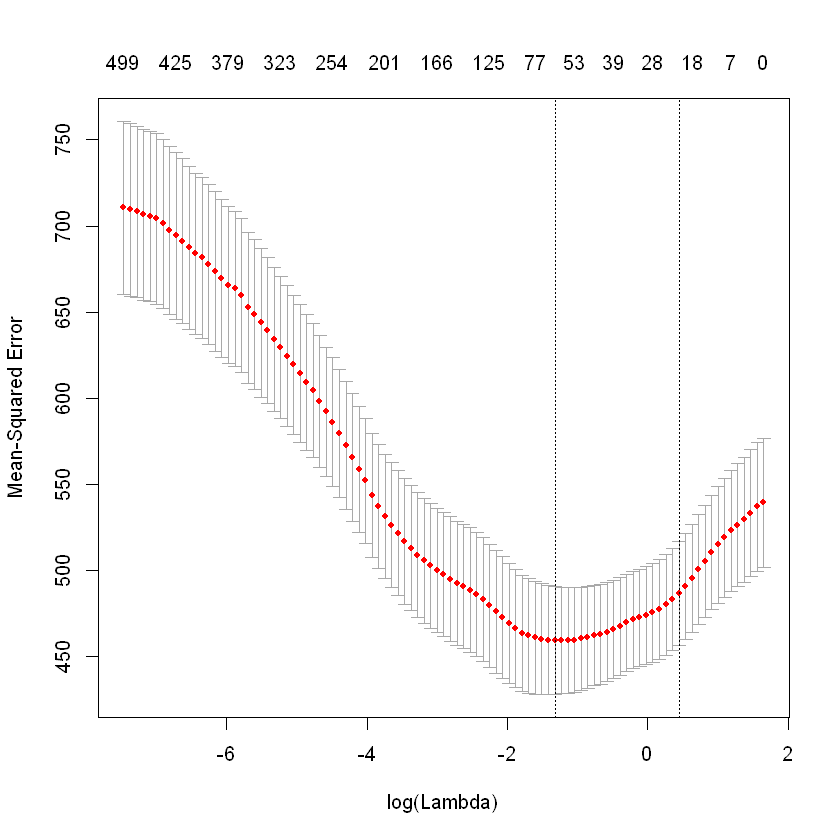

In [53]:
plot(cv)

------------------------------------------------------------------------------------------------------------------------------------------------------